## 05 Joint evidence

This notebook describes the six biomarkers compared between NR and R group, which were generated by microbiota 16S amplicon sequencing, whole exome sequencing, tumor RNAseq, and IHC experiments ([Figure S6](assets/Figure_S6.tif)).

15 samples with all four types of data available (16S, exome, RNAseq, and IHC) were included in analysis.

* qPCR score: calculated using qPCR abundance of 10 selected species shown in Figure 2D
* OTU ratio: the ratio of number of beneficial to non-beneficial OTUs shwon in Figure 2E
* NSSM: number of non-synonymous somatic mutations (both SNVs and small indels included) in tumor
* PDL1 gene expression: normalized and log2-transformed PDL1 (alias CD274) expression level from RNAseq data
* PD1 gene expression: normalized and log2-transformed PD1 (alias PDCD1) expression level from RNAseq data
* CD8+ IHC cell density: ratio of number of CD8 positive cells/pixel to total number of cells/pixel  


***

### 5.1 Clean environment. Load libraries.

In [14]:
rm(list = ls())

##-- load libs
suppressMessages(library(ggplot2))
suppressMessages(library(reshape2))
suppressMessages(library(broom))
suppressMessages(library(dplyr))

### 5.2 Import data files.

In [15]:
##-- global variables

biomarkers = c('qPCR.score', 'OTU.ratio','NSSM',
               'PDL1.expr', 'PD1.expr', 'CD8.IHC.density')

##-- data files
evi.file = '../data/human_joint_evidence.csv'

##-- import data 
evi = read.csv(evi.file, row.names = 1)

print(dim(evi))
print(colnames(evi))

[1] 15  8
[1] "Response"        "BORR"            "PDL1.expr"       "PD1.expr"       
[5] "NSSM"            "qPCR.score"      "OTU.ratio"       "CD8.IHC.density"


### 5.3 Compare each biomarker between NR and R groups.

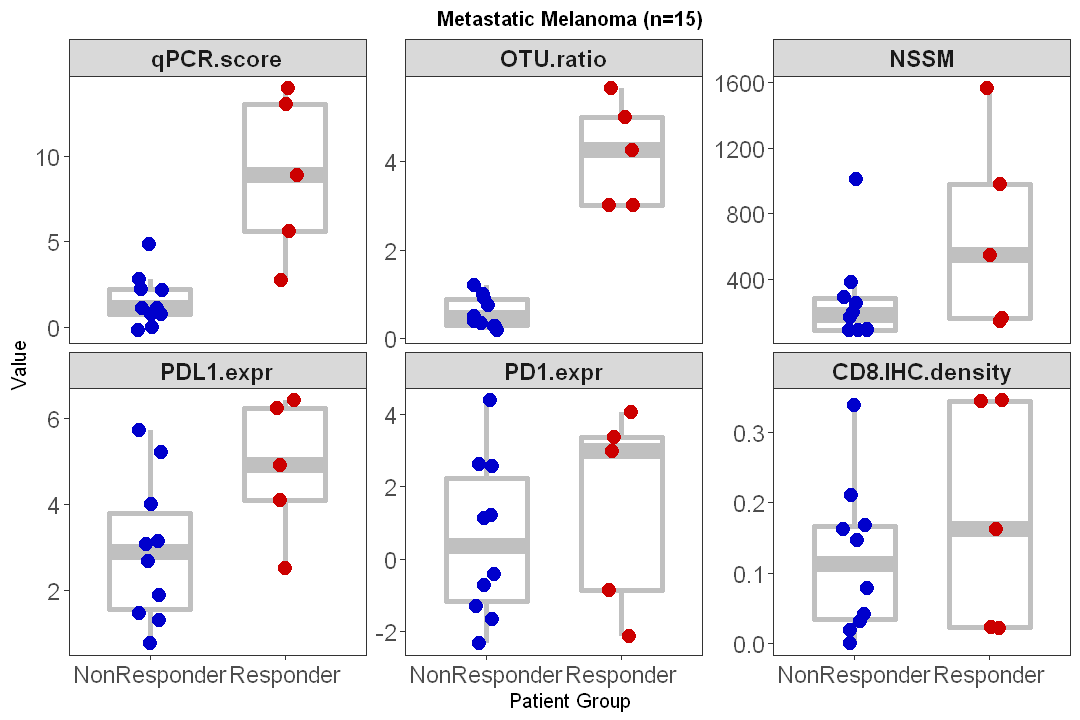

In [16]:
##-- set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/png")
options(repr.plot.width = 9, repr.plot.height = 6)

##-- draw boxplots
data.plot = melt(evi, id.vars = c('Response', 'BORR'))
colnames(data.plot)[3:4] = c('Biomarker', 'Value')
data.plot$Response = factor(data.plot$Response, levels = c('NonResponder',
                                                           'Responder'))
data.plot$Biomarker = factor(data.plot$Biomarker, levels = biomarkers)

plot.colors = c('Responder'='#CC0000','NonResponder'='#0000CC')
plot.title = paste0('Metastatic Melanoma (n=', nrow(evi),')')
plot.shapes = c('Responder' = 19, 'NonResponder' = 1)

p1 = ggplot(data.plot, aes(Response, Value)) +
  geom_boxplot(width = 0.6, color = '#C0C0C0',lwd=1.5,fatten=3,
               outlier.shape = NA) +
  geom_jitter(aes(color = Response), width = 0.10, height = 0.0, size = 3.5) +
  scale_color_manual(values = plot.colors) +
  ggtitle(label = plot.title) +
  xlab('Patient Group') +
  theme_bw() + 
  theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank()) +
  theme(axis.text=element_text(size=14), axis.title=element_text(size=12),
        axis.text.x = element_text(angle = 0),
        plot.title = element_text(size=12,face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=8,hjust = 0.5)) +  
  theme(strip.text.x = element_text(size =14, face="bold")) +
  theme(legend.position = 'none') +
  facet_wrap( ~ Biomarker, nrow = 2, scales = 'free_y')

print(p1)

### 5.4 Compute statistical significance of differences between NR and R groups.

In [17]:
for(mk in biomarkers) {
  
  my.list = split(evi[,mk],evi[,'Response'])
  p = NA
  test = ''

  if(mk %in% c('qPCR.score','OTU.ratio','NSSM')) {
    test = 'wilcox.test'
    p = tidy(wilcox.test(my.list$NonResponder, my.list$Responder)) %>% 
                          select('p.value') %>%
                          mutate(p.value.r5 = round(p.value, 5))
   
  } else if(mk %in% c('PDL1.expr','PD1.expr','CD8.IHC.density')) {
    test = 't.test'
    p = tidy(t.test(my.list$NonResponder, my.list$Responder)) %>% 
                          select('p.value') %>%
                          mutate(p.value.r5 = round(p.value, 5))
  }
  
  print(paste0(mk, ', P=', p[,2], ', ',test))
}

[1] "qPCR.score, P=0.00266, wilcox.test"


Warning message in wilcox.test.default(my.list$NonResponder, my.list$Responder):
"cannot compute exact p-value with ties"

[1] "OTU.ratio, P=0.00265, wilcox.test"
[1] "NSSM, P=0.20646, wilcox.test"
[1] "PDL1.expr, P=0.06358, t.test"
[1] "PD1.expr, P=0.53539, t.test"
[1] "CD8.IHC.density, P=0.48526, t.test"


In [18]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2   dplyr_0.7.4    broom_0.4.2    reshape2_1.4.2 ggplot2_2.2.1 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.13     compiler_3.4.2   plyr_1.8.4       bindr_0.1       
 [5] tools_3.4.2      digest_0.6.12    uuid_0.1-2       jsonlite_1.5    
 [9] evaluate_0.10.1  tibble_1.3.4     gtable_0.2.0     nlme_3.1-131    
[13] lattice_0.20-35  pkgconfig_2.0.1  rlang_0.1.4      psych_1.7.8     
[17] IRdisplay_0.4.4  IRkernel_0.8.9   parallel_3.4.2   repr_0.12.0     
[21] stringr_1.2.0    